In [36]:
from theano.sandbox import cuda

In [39]:
%matplotlib inline
import utils; reload(utils)
from __future__ import division, print_function

ImportError: cannot import name activity_l2

In [ ]:
#path = "data/ml-20m/"
path = "../data/ml-latest-small/"
model_path = path + 'models/'
print (os.path.exists(path))
if not os.path.exists(model_path): 
    os.mkdir(model_path)
batch_size=64

## Set up data

We're working with the movielens data, which contains one rating per row, like this:

In [3]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

NameError: name 'pd' is not defined

In [4]:
ratings

NameError: name 'ratings' is not defined

In [5]:
list(ratings)

NameError: name 'ratings' is not defined

In [6]:
len(ratings)

NameError: name 'ratings' is not defined

### code_trouble_shooting(1) - What is pd.DataFrame?

In [7]:
ex_col = ['a','b','c']
ex_data = pd.DataFrame([[1,2,3],[10,11,12],[20,21,22],[20,21,22],[20,21,22],[20,21,22]] , columns = ex_col)
ex_data

NameError: name 'pd' is not defined

In [8]:
ex_data2 = ex_data.set_index('a')
ex_data2

NameError: name 'ex_data' is not defined

### code_trouble_shooting(2) - What is pd.DataFrame['column_name']?

In [9]:
ex_data2['a']

NameError: name 'ex_data2' is not defined

In [10]:
ex_data2['b']

NameError: name 'ex_data2' is not defined

### code_trouble_shooting(3) - What is to_dict()?

In [11]:
ex_data2['b'].to_dict()

NameError: name 'ex_data2' is not defined

In [12]:
ex_data.a

NameError: name 'ex_data' is not defined

### code_trouble_shooting(4) - What is unique()?

In [13]:
ex_data.a.unique()

NameError: name 'ex_data' is not defined

### code_trouble_shooting(5) - What is enumerate()?

In [14]:
t = {o:i for i,o in enumerate(ex_data.a.unique())}
{o:i for i,o in enumerate(ex_data.a.unique())}

NameError: name 'ex_data' is not defined

In [15]:
ex_data.a

NameError: name 'ex_data' is not defined

### code_trouble_shooting(6) - What is apply(lambda )?

In [16]:
ex_data.a.apply(lambda x: t[x])

NameError: name 'ex_data' is not defined

In [17]:
ex_data.a

NameError: name 'ex_data' is not defined

Just for display purposes, let's read in the movie names too. 아래 코드는 movieId를 키값으로, 그리고 해당 키의 value로 title 설정해서, dictionary로 저장한다.

In [18]:
movie_names = pd.read_csv(path+'movies.csv').set_index('movieId')['title'].to_dict()
len(movie_names)

NameError: name 'pd' is not defined

In [19]:
for_list_movies = pd.read_csv(path+'movies.csv')
for_list_movies.head()

NameError: name 'pd' is not defined

In [20]:
list(for_list_movies)

NameError: name 'for_list_movies' is not defined

아래 코드는 userId, movieId의 unique한 값들을 array type으로 저장한다.

In [21]:
users = ratings.userId.unique()
movies = ratings.movieId.unique()

NameError: name 'ratings' is not defined

In [22]:
users

NameError: name 'users' is not defined

In [23]:
ratings.userId

NameError: name 'ratings' is not defined

In [24]:
movies

NameError: name 'movies' is not defined

In [25]:
ratings.head()

NameError: name 'ratings' is not defined

아래 코드는 user에 저장되어있는 userid들의 array 속에서 ith_array_element를 key로, i를 value로 dictionary를 만든다.

- ith_user_id : i

ratings.csv 파일에서 유저 아이디는 1,2,3... 순차적으로 저장되어있음을 확인.

- ith_movie_id : i


ratings.csv 파일에서 movieId는 순차적으로 저장되어 있지 않다.

In [26]:
userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

NameError: name 'users' is not defined

In [27]:
userid2idx

NameError: name 'userid2idx' is not defined

?? 10만이 넘는 i값은 왜 나오는가??

In [28]:
movieid2idx

NameError: name 'movieid2idx' is not defined

We update the movie and user ids so that they are contiguous integers, which we want when using embeddings.

In [29]:
ratings.movieId = ratings.movieId.apply(lambda x: movieid2idx[x])
ratings.userId = ratings.userId.apply(lambda x: userid2idx[x])

NameError: name 'ratings' is not defined

ratings의 userId column, movieId column element들이 달라졌음을 확인할 수 있습니다. 각 유저가 본 영화들이 그루핑되어있음을 확인할 수 있습니다. 유저 0이 본 영화들 0,1,2,3,4, .. // 유저 1이 본 영화들 0,1,2,3, ... // 이런식.

In [30]:
ratings

NameError: name 'ratings' is not defined

유저 수, 영화 수를 확인할 수 있습니다.

In [31]:
user_min, user_max, movie_min, movie_max = (ratings.userId.min(), 
    ratings.userId.max(), ratings.movieId.min(), ratings.movieId.max())
user_min, user_max, movie_min, movie_max

NameError: name 'ratings' is not defined

In [32]:
n_users = ratings.userId.nunique()
n_movies = ratings.movieId.nunique()
n_users, n_movies

NameError: name 'ratings' is not defined

This is the number of latent factors in each embedding.

what are the latent factors?
- 영화가 재미있는지, 브루스윌리스가 나오는지 등의 특징들을 지칭합니다.

: some possible features these latent factors may represent for a movie embedding are things like whether the movie is a blockbuster, if it's funny, etc.

- 다른 식으로 보면 이렇게도 볼 수 있겠지요.

: 학생들의 시험 성적 데이터를 예를 들어 생각해보자. 이 데이터가 수학, 과학, 영어, 중국어, 독어, 작곡, 연주 의 점수(0점-100점)으로 구성되어 있다고 하면, 수학, 과학은 상관관계가 있을 것이고 (수리계산능력), 영어, 중국어, 독어 가 상관관계가 있을 것이고 (외국어능력), 작곡, 연주 가 상관관계가 있을 것입니다. (음악적능력, 음악적재능).

즉, 원래 7개의 변수(과목)으로 구성되어있지만, 그냥 봐서는 잘 모르지만 상관관계를 따져보면, 내부적으로는 3개의 잠재변수 즉, [수리계산능력], [외국어능력], [음악적재능] 으로 구성된 것으로 파악할 수 있습니다.

이렇게 원래 많은 수(7개)의 변수들을 소수의 몇 개의(3개)의 잠재된 변수로 찾아내는 것을 요인분석이라고 합니다. 감이 오겠지만 ... 요인분석은 데이터 축소(Data Reduction)과 관계가 있다. 이렇게 찾은 잠재변수를 영어로는 Latent Variable 이라고 부릅니다. 

요인분석(Factor Analysis)은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석방법입니다. 다른 말로 하면, 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들 끼리 묶어주는 방법입니다. 또 다른 말로 하면, 많은 변수로 구성된 데이터가 몇 개의 요인에 의해 영향을 받는가를 알아보는 것이라고도 할 수 있습니다. 

출처: http://ai-times.tistory.com/112 [ai-times]


- 하지만, 사실 그 특징이 어떤 특징인지는 모릅니다. 다만, ratings를 예측할 때, 유용한 값일 뿐입니다. 요인의 갯수도 임의로 설정할 뿐입니다.

: we don't actually know exactly what attributes these factors are describing, only that through gradient descent we have learned these to be the most useful at predicting user ratings.

- 케라스에서는 Embedding Layer를 사용합니다.

: Keras uses something called an Embedding Layer that looks up the appropriate embeddings given an id, and handles the training of said factors.

In [33]:
n_factors = 50

In [34]:
np.random.seed = 42

NameError: name 'np' is not defined

In [35]:
np.random.seed

NameError: name 'np' is not defined

Randomly split into training and validation.

In [79]:
msk = np.random.rand(len(ratings)) < 0.8
trn = ratings[msk]
val = ratings[~msk]

what is np.random.seed?

다른 곳에서의 설명은 이러한데... 여기서는 적용이 안된다.
https://datascienceschool.net/view-notebook/8bf41f87a08b4c44b307799577736a28/


In [80]:
np.random.rand(3) < 0.8

array([ True,  True,  True], dtype=bool)

In [1]:
np.random.seed = 42

NameError: name 'np' is not defined

In [82]:
np.random.rand(3)

array([ 0.5818,  0.6369,  0.8093])

In [83]:
np.random.seed = 42

In [84]:
np.random.rand(3)

array([ 0.3905,  0.9291,  0.2812])

In [85]:
np.random.rand(3)

array([ 0.6538,  0.1634,  0.3023])

## Create subset for Excel

We create a crosstab of the most popular movies and most movie-addicted users which we'll copy into Excel for creating a simple example. This isn't necessary for any of the modeling below however.

In [86]:
ex_col = ['a','b','c']
ex_data = pd.DataFrame([[1,2,3],[10,11,12],[20,21,22],[20,21,22],[20,21,22],[20,21,22]] , columns = ex_col)
ex_data

,a,b,c
0,1,2,3
1,10,11,12
2,20,21,22
3,20,21,22
4,20,21,22
5,20,21,22


In [87]:
ex_data.groupby('a')['b'].count()

a
1     1
10    1
20    4
Name: b, dtype: int64

각 유저가 본 영화의 갯수를 g에 저장합니다. 그리고는 내림차순으로 15개를 topUsers 변수에 저장합니다.

In [88]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

In [89]:
g

userId
0        20
1        76
2        51
3       204
4       100
5        44
6        88
7       116
8        45
9        46
10       38
11       61
12       53
13       20
14     1700
15       29
16      363
17       51
18      423
19       98
20      162
21      220
22      726
23       21
24       26
25      172
26       23
27       50
28       22
29     1011
       ... 
641      36
642      24
643      39
644      30
645     169
646     150
647     256
648      90
649      29
650      20
651     267
652      51
653     626
654     105
655     128
656      20
657      60
658     142
659      92
660      33
661      58
662      26
663     519
664     434
665      40
666      68
667      20
668      37
669      31
670     115
Name: rating, dtype: int64

In [90]:
topUsers

userId
546    2391
563    1868
623    1735
14     1700
72     1610
451    1340
467    1291
379    1063
310    1019
29     1011
293     947
508     923
579     922
212     910
211     876
Name: rating, dtype: int64

각 영화와 영화마다 평점받은 횟수를 g에 저장합니다. 그리고는 내림차순으로 15개를 topMovies 변수에 저장합니다.

In [91]:
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

In [92]:
g

movieId
0        42
1        42
2        33
3        48
4        46
5        48
6        46
7        46
8        52
9        39
10       47
11       46
12       46
13       47
14       36
15       42
16       53
17       47
18       43
19       62
20      122
21       86
22      120
23      201
24      201
25       51
26       87
27      228
28       26
29      200
       ... 
9036      1
9037      1
9038      1
9039      1
9040      1
9041      1
9042      1
9043      1
9044      1
9045      1
9046      1
9047      1
9048      1
9049      1
9050      1
9051      1
9052      1
9053      1
9054      1
9055      1
9056      1
9057      1
9058      1
9059      1
9060      1
9061      1
9062      1
9063      1
9064      1
9065      1
Name: rating, dtype: int64

In [93]:
topMovies

movieId
57     341
49     324
99     311
92     304
143    291
72     274
402    259
417    247
79     244
89     237
179    234
27     228
197    226
505    224
180    220
Name: rating, dtype: int64

### code_trouble_shooting(10): what is pd.dataFrame.join()?

In [98]:
ex_data = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                 'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
ex_data

,A,key
0,A0,K0
1,A1,K1
2,A2,K2
3,A3,K3
4,A4,K4
5,A5,K5


In [99]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
other

,B,key
0,B0,K0
1,B1,K1
2,B2,K2


- lsuffix


: Suffix to use from left frame’s overlapping columns

- rsuffix


: Suffix to use from right frame’s overlapping columns

In [100]:
ex_data.join(other, lsuffix='_caller', rsuffix='_other')

NameError: name 'caller' is not defined

If we want to join using the key columns, we need to set key to be the index in both caller and other. The joined DataFrame will have key as its index.

In [97]:
ex_data.set_index('key').join(other.set_index('key'))

NameError: name 'caller' is not defined

Another option to join using the key columns is to use the on parameter. DataFrame.join always uses other’s index but we can use any column in the caller. This method preserves the original caller’s index in the result.

In [301]:
ex_data.join(other.set_index('key'), on='key')

,A,key,B
0,A0,K0,B0
1,A1,K1,B1
2,A2,K2,B2
3,A3,K3,NaN
4,A4,K4,NaN
5,A5,K5,NaN


In [302]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='inner', on='key')

,key,A,key_l,B,key_r


inner: form intersection of calling frame’s index (or column if on is specified) with other frame’s index, preserving the order of the calling’s one

In [303]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='inner')

,A,key_l,B,key_r
0,A0,K0,B0,K0
1,A1,K1,B1,K1
2,A2,K2,B2,K2


outer: form union of calling frame’s index (or column if on is specified) with other frame’s index, and sort it lexicographically

Column(s)[in this case: key] in the caller to join on the index in other, otherwise joins index-on-index. If multiples columns given, the passed DataFrame must have a MultiIndex. Can pass an array as the join key if not already contained in the calling DataFrame.

In [304]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='outer', on='key')

,key,A,key_l,B,key_r
0,K0,A0,K0,NaN,NaN
1,K1,A1,K1,NaN,NaN
2,K2,A2,K2,NaN,NaN
3,K3,A3,K3,NaN,NaN
4,K4,A4,K4,NaN,NaN
5,K5,A5,K5,NaN,NaN
5,0,NaN,NaN,B0,K0
5,1,NaN,NaN,B1,K1
5,2,NaN,NaN,B2,K2


outer: form union of calling frame’s index (or column if on is specified) with other frame’s index, and sort it lexicographically

In [305]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='outer')

,A,key_l,B,key_r
0,A0,K0,B0,K0
1,A1,K1,B1,K1
2,A2,K2,B2,K2
3,A3,K3,NaN,NaN
4,A4,K4,NaN,NaN
5,A5,K5,NaN,NaN


left : use calling frame's index

Column(s)[in this case: A, key] in the caller to join on the index in other, otherwise joins index-on-index. If multiples columns given, the passed DataFrame must have a MultiIndex. Can pass an array as the join key if not already contained in the calling DataFrame.

In [306]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='left', on='key')

,A,key_l,B,key_r
0,A0,K0,NaN,NaN
1,A1,K1,NaN,NaN
2,A2,K2,NaN,NaN
3,A3,K3,NaN,NaN
4,A4,K4,NaN,NaN
5,A5,K5,NaN,NaN


left : use calling frame's index

In [307]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='left')

,A,key_l,B,key_r
0,A0,K0,B0,K0
1,A1,K1,B1,K1
2,A2,K2,B2,K2
3,A3,K3,NaN,NaN
4,A4,K4,NaN,NaN
5,A5,K5,NaN,NaN


right: use other frame’s index

Column(s)[in this case: key] in the caller to join on the index in other, otherwise joins index-on-index. If multiples columns given, the passed DataFrame must have a MultiIndex. Can pass an array as the join key if not already contained in the calling DataFrame.

In [308]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='right', on='key')

,key,A,key_l,B,key_r
5,0,NaN,NaN,B0,K0
5,1,NaN,NaN,B1,K1
5,2,NaN,NaN,B2,K2


right: use other frame’s index

In [309]:
ex_data.join(other, lsuffix = '_l', rsuffix = '_r', how='right')

,A,key_l,B,key_r
0,A0,K0,B0,K0
1,A1,K1,B1,K1
2,A2,K2,B2,K2


### on 

: column name, tuple/list of column names, or array-like

Column(s) in the caller to join on the index in other, otherwise joins index-on-index. If multiples columns given, the passed DataFrame must have a MultiIndex. Can pass an array as the join key if not already contained in the calling DataFrame. Like an Excel VLOOKUP operation

### how 

: {‘left’, ‘right’, ‘outer’, ‘inner’}, default: ‘left’

How to handle the operation of the two objects.

- left: use calling frame’s index (or column if on is specified)

- right: use other frame’s index

- outer: form union of calling frame’s index (or column if on is specified) with other frame’s index, and sort it lexicographically

- inner: form intersection of calling frame’s index (or column if on is specified) with other frame’s index, preserving the order of the calling’s one

inner: form intersection of calling frame’s index (or column if on is specified) with other frame’s index, preserving the order of the calling’s one

Column [in this case, the column 'userId'] in the caller to join on the index in other, otherwise joins index-on-index.

# 아직 잘 모르겠는 부분.

ratings의 순서를 유지하면서(그러니깐, topUsers의 첫 element 118204대신 ratings의 첫 element 8404가 먼저 나옵니다.), ratings와 topUsers의 intersection을 합니다. on='userId'이므로, ratings의 'userId'컬럼을 기준으로, 묶습니다.

row의 갯수는 topUsers가 본 영화들의 총합입니다.

In [101]:
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')

In [102]:
list(ratings)

['userId', 'movieId', 'rating', 'timestamp']

In [103]:
topUsers

userId
546    2391
563    1868
623    1735
14     1700
72     1610
451    1340
467    1291
379    1063
310    1019
29     1011
293     947
508     923
579     922
212     910
211     876
Name: rating, dtype: int64

In [104]:
top_r

,userId,movieId,rating,timestamp,rating_r
962,14,417,2.0,997938310,1700
963,14,650,2.0,1134521380,1700
964,14,651,4.5,1093070098,1700
965,14,652,4.0,1040205753,1700
966,14,20,3.0,1093028290,1700
967,14,653,2.5,1093028381,1700
968,14,654,2.5,1166586286,1700
969,14,655,3.5,1093070150,1700
970,14,21,3.0,997939404,1700
971,14,656,1.0,1093028409,1700


In [105]:
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

In [106]:
top_r

,userId,movieId,rating,timestamp,rating_r,rating_r
962,14,417,2.0,997938310,1700,247
5048,29,417,4.0,944943070,1011,247
10214,72,417,5.0,1303464840,1610,247
28390,211,417,3.0,1218405007,876,247
29266,212,417,3.0,1462637445,910,247
40153,293,417,4.0,1047071649,947,247
43329,310,417,3.0,898007830,1019,247
51144,379,417,4.0,1048092869,1063,247
61432,451,417,3.5,1133735252,1340,247
65657,467,417,4.0,1296195523,1291,247


In [112]:
pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,27,49,57,72,79,89,92,99,143,179,180,197,402,417,505
userId,,,,,,,,,,,,,,,
14,3.0,5.0,1.0,3.0,4.0,4.0,5.0,2.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0
29,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0
72,4.0,5.0,5.0,4.0,5.0,3.0,4.5,5.0,4.5,5.0,5.0,5.0,4.5,5.0,4.0
211,5.0,4.0,4.0,3.0,5.0,3.0,4.0,4.5,4.0,NaN,3.0,3.0,5.0,3.0,NaN
212,2.5,NaN,2.0,5.0,NaN,4.0,2.5,NaN,5.0,5.0,3.0,3.0,4.0,3.0,2.0
293,3.0,NaN,4.0,4.0,4.0,3.0,NaN,3.0,4.0,4.0,4.5,4.0,4.5,4.0,NaN
310,3.0,3.0,5.0,4.5,5.0,4.5,2.0,4.5,4.0,3.0,4.5,4.5,4.0,3.0,4.0
379,5.0,5.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,4.0,NaN,3.0,5.0,4.0,4.0
451,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,2.0,3.5,5.0


## Dot product

The most basic model is a dot product of a movie embedding and a user embedding. Let's see how well that works:

### What are embeddings?

Collaborative filtering is an approach that learns from this sort of data to make predictions for new users, and this is done by constructing an embedding for every distinct mover and every distinct user. 

These embeddings are simply vectors whose elements describe an as of yet unknown quality or feature. If we take the dot product for each user/movie embedding pair and call it that user's rating for that movie, we can now train the elements of each embedding as parameters in a gradient descent optimization problem, where the actual ratings are used as the true labels. 

In the lecture, we can see we've achieved pretty good results using such a simple idea.

#### keras.layers.embeddings.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)

- n_users(671명) 가 인풋_dim, n_factors(50개)가 아웃풋_dim, input_length()는 1로 잡아준다.

The weights of the Embedding layer are of the shape (vocabulary_size, embedding_dimension). For each training sample, its input are integers, which represent certain words. The integers are in the range of the vocabulary size. The Embedding layer transforms each integer i into the ith line of the embedding weights matrix.

In order to quickly do this as a matrix multiplication, the input integers are not stored as a list of integers but as a one-hot matrix. Therefore the input shape is (nb_words, vocabulary_size) with one non-zero value per line. If you multiply this by the embedding weights, you get the output in the shape

- (nb_words, vocab_size) x (vocab_size, embedding_dim) = (nb_words, embedding_dim)

The weights of the Embedding layer are of the shape (vocabulary_size, embedding_dimension). For each training sample, its input are integers, which represent certain words. The integers are in the range of the vocabulary size. The Embedding layer transforms each integer i into the ith line of the embedding weights matrix.

In order to quickly do this as a matrix multiplication, the input integers are not stored as a list of integers but as a one-hot matrix. Therefore the input shape is (nb_words, vocabulary_size) with one non-zero value per line. If you multiply this by the embedding weights, you get the output in the shape (nb_words, vocab_size) x (vocab_size, embedding_dim) = (nb_words, embedding_dim)

- mapping to vector space

Roughly, the idea of Word2Vec is that our vocabulary is discrete and we will learn an map which will embed each word into a continuous vector space. Using this vector space representation will allow us to have a continuous, distributed representation of our vocabulary words. 

In [117]:
user_in = Input(shape=(1,), dtype='int64', name='user_in')
u = Embedding(n_users, n_factors, input_length=1, W_regularizer=l2(1e-4))(user_in)
movie_in = Input(shape=(1,), dtype='int64', name='movie_in')
m = Embedding(n_movies, n_factors, input_length=1, W_regularizer=l2(1e-4))(movie_in)

In [127]:
n_users

671

In [126]:
n_factors

50

In [118]:
user_in

<tf.Tensor 'user_in_2:0' shape=(?, 1) dtype=int64>

In [119]:
u

<tf.Tensor 'Gather_4:0' shape=(?, 1, 50) dtype=float32>

In [120]:
movie_in

<tf.Tensor 'movie_in_2:0' shape=(?, 1) dtype=int64>

In [121]:
m

<tf.Tensor 'Gather_5:0' shape=(?, 1, 50) dtype=float32>

In [122]:
x = merge([u, m], mode='dot')
x = Flatten()(x)
model = Model([user_in, movie_in], x)
model.compile(Adam(0.001), loss='mse')

In [123]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=1, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/1
80027/80027 [==============================] - 32s - loss: 10.1119 - val_loss: 4.3743


In [124]:
model.optimizer.lr=0.01

In [125]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=3, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/3
80027/80027 [==============================] - 33s - loss: 3.1655 - val_loss: 2.8278
Epoch 2/3
80027/80027 [==============================] - 38s - loss: 2.4206 - val_loss: 2.5970
Epoch 3/3
80027/80027 [==============================] - 38s - loss: 2.2473 - val_loss: 2.5487


In [128]:
model.optimizer.lr=0.001

In [129]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=6, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/6
80027/80027 [==============================] - 36s - loss: 2.1799 - val_loss: 2.5302
Epoch 2/6
80027/80027 [==============================] - 38s - loss: 2.1436 - val_loss: 2.5256
Epoch 3/6
80027/80027 [==============================] - 40s - loss: 2.1181 - val_loss: 2.5253
Epoch 4/6
80027/80027 [==============================] - 39s - loss: 2.0948 - val_loss: 2.5356
Epoch 5/6
80027/80027 [==============================] - 40s - loss: 2.0761 - val_loss: 2.5378
Epoch 6/6
80027/80027 [==============================] - 40s - loss: 2.0562 - val_loss: 2.5431


The [best benchmarks](http://www.librec.net/example.html) are a bit over 0.9, so this model doesn't seem to be working that well...

##  Bias

The problem is likely to be that we don't have bias terms - that is, a single bias for each user and each movie representing how positive or negative each user is, and how good each movie is. We can add that easily by simply creating an embedding with one output for each movie and each user, and adding it to our output.

One thing we have not accounted for yet is bias. In this context, we can think of bias as something that might describe whether or not a user in general likes movies more than others, or whether some movies are more popular than others. We can include this by modifying our collaborative filtering process to include bias terms for each user and movie, which are simply added on to the dot product. These bias terms are also treated as parameters in training, and optimized in gradient descent. We find after training that our result here is better than without bias, as expected.

In [130]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1, W_regularizer=l2(reg))(inp)

what is W_regularizer?

what is Embedding(...)(inp)?? (inp)>....?

:일종의 model.add()로 봐야할 듯 싶습니다.

In [131]:
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
movie_in, m = embedding_input('movie_in', n_movies, n_factors, 1e-4)

In [132]:
def create_bias(inp, n_in):
    x = Embedding(n_in, 1, input_length=1)(inp)
    return Flatten()(x)

In [133]:
ub = create_bias(user_in, n_users)
mb = create_bias(movie_in, n_movies)

In [134]:
x = merge([u, m], mode='dot')
x = Flatten()(x)
x = merge([x, ub], mode='sum')
x = merge([x, mb], mode='sum')
model = Model([user_in, movie_in], x)
model.compile(Adam(0.001), loss='mse')

In [135]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=1, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/1
80027/80027 [==============================] - 41s - loss: 8.8780 - val_loss: 3.5386


In [136]:
model.optimizer.lr=0.01

In [137]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=6, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/6
80027/80027 [==============================] - 38s - loss: 2.5941 - val_loss: 2.3062
Epoch 2/6
80027/80027 [==============================] - 35s - loss: 2.0009 - val_loss: 2.0937
Epoch 3/6
80027/80027 [==============================] - 37s - loss: 1.8368 - val_loss: 1.9959
Epoch 4/6
80027/80027 [==============================] - 40s - loss: 1.7410 - val_loss: 1.9216
Epoch 5/6
80027/80027 [==============================] - 42s - loss: 1.6588 - val_loss: 1.8532
Epoch 6/6
80027/80027 [==============================] - 41s - loss: 1.5825 - val_loss: 1.7887


In [138]:
model.optimizer.lr=0.001

In [139]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=10, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/10
80027/80027 [==============================] - 40s - loss: 1.5087 - val_loss: 1.7245
Epoch 2/10
80027/80027 [==============================] - 41s - loss: 1.4371 - val_loss: 1.6668
Epoch 3/10
80027/80027 [==============================] - 45s - loss: 1.3683 - val_loss: 1.6177
Epoch 4/10
80027/80027 [==============================] - 48s - loss: 1.3040 - val_loss: 1.5606
Epoch 5/10
80027/80027 [==============================] - 49s - loss: 1.2408 - val_loss: 1.5121
Epoch 6/10
80027/80027 [==============================] - 47s - loss: 1.1799 - val_loss: 1.4634
Epoch 7/10
80027/80027 [==============================] - 37s - loss: 1.1226 - val_loss: 1.4180
Epoch 8/10
80027/80027 [==============================] - 34s - loss: 1.0682 - val_loss: 1.3748
Epoch 9/10
80027/80027 [==============================] - 42s - loss: 1.0159 - val_loss: 1.3358
Epoch 10/10
80027/80027 [==============================] - 49s - loss: 0.9662 - val_lo

In [140]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=5, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80027 samples, validate on 19977 samples
Epoch 1/5
80027/80027 [==============================] - 46s - loss: 0.9201 - val_loss: 1.2641
Epoch 2/5
80027/80027 [==============================] - 47s - loss: 0.8767 - val_loss: 1.2319
Epoch 3/5
80027/80027 [==============================] - 44s - loss: 0.8360 - val_loss: 1.2028
Epoch 4/5
80027/80027 [==============================] - 47s - loss: 0.7991 - val_loss: 1.1752
Epoch 5/5
80027/80027 [==============================] - 47s - loss: 0.7646 - val_loss: 1.1505


This result is quite a bit better than the best benchmarks that we could find with a quick google search - so looks like a great approach!

In [141]:
model.save_weights(model_path+'bias.h5')

In [142]:
model.load_weights(model_path+'bias.h5')

We can use the model to generate predictions by passing a pair of ints - a user id and a movie id. For instance, this predicts that user #3 would really enjoy movie #6.

In [144]:
model.predict([np.array([3]), np.array([6])])

array([[ 4.9707]], dtype=float32)

## Analyze results

To make the analysis of the factors more interesting, we'll restrict it to the top 2000 most popular movies.

:g는 (1) 영화와 (2) 영화가 rate된 횟수를 저장하는 변수입니다.


:topMovies는 제일 많이 본 상위 2000개를 뽑아내 저장하는 변수입니다.


:이후에 topMovies는 array로 변합니다.

In [153]:
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:2000]
topMovies = np.array(topMovies.index)
topMovies

array([  57,   49,   99, ..., 3436, 1804, 1793])

First, we'll look at the movie bias term. We create a 'model' - which in keras is simply a way of associating one or more inputs with one more more outputs, using the functional API. Here, our input is the movie id (a single id), and the output is the movie bias (a single float).

zip(iterable*)은 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수이다.

list(zip([1, 2, 3], [4, 5, 6]))


>[(1, 4), (2, 5), (3, 6)]

In [154]:
get_movie_bias = Model(movie_in, mb)
movie_bias = get_movie_bias.predict(topMovies)
movie_ratings = [(b[0], movie_names[movies[i]]) for i,b in zip(topMovies,movie_bias)]

In [155]:
movie_in

<tf.Tensor 'movie_in_3:0' shape=(?, 1) dtype=int64>

In [156]:
mb

<tf.Tensor 'Reshape_2:0' shape=(?, ?) dtype=float32>

In [157]:
movie_bias

array([[ 1.007 ],
       [ 1.0626],
       [ 1.2657],
       ..., 
       [ 0.9274],
       [ 0.344 ],
       [ 0.464 ]], dtype=float32)

In [158]:
len(movie_bias)

2000

In [160]:
zip(topMovies, movie_bias)

[(57, array([ 1.007], dtype=float32)),
 (49, array([ 1.0626], dtype=float32)),
 (99, array([ 1.2657], dtype=float32)),
 (92, array([ 1.0792], dtype=float32)),
 (143, array([ 0.9246], dtype=float32)),
 (72, array([ 0.8517], dtype=float32)),
 (402, array([ 0.8916], dtype=float32)),
 (417, array([ 0.7703], dtype=float32)),
 (79, array([ 1.075], dtype=float32)),
 (89, array([ 0.8047], dtype=float32)),
 (179, array([ 0.8842], dtype=float32)),
 (27, array([ 0.865], dtype=float32)),
 (197, array([ 0.9229], dtype=float32)),
 (505, array([ 1.0475], dtype=float32)),
 (180, array([ 0.8509], dtype=float32)),
 (121, array([ 0.9151], dtype=float32)),
 (432, array([ 0.8491], dtype=float32)),
 (106, array([ 0.878], dtype=float32)),
 (88, array([ 0.7444], dtype=float32)),
 (69, array([ 1.1116], dtype=float32)),
 (122, array([ 0.8346], dtype=float32)),
 (90, array([ 0.787], dtype=float32)),
 (23, array([ 0.8345], dtype=float32)),
 (24, array([ 0.9846], dtype=float32)),
 (59, array([ 0.7071], dtype=float

In [159]:
movie_ratings

[(1.0069525, 'Forrest Gump (1994)'),
 (1.0625799, 'Pulp Fiction (1994)'),
 (1.2656702, 'Shawshank Redemption, The (1994)'),
 (1.0792106, 'Silence of the Lambs, The (1991)'),
 (0.92464334, 'Star Wars: Episode IV - A New Hope (1977)'),
 (0.85171789, 'Jurassic Park (1993)'),
 (0.89157087, 'Matrix, The (1999)'),
 (0.77026284, 'Toy Story (1995)'),
 (1.075048, "Schindler's List (1993)"),
 (0.80471236, 'Terminator 2: Judgment Day (1991)'),
 (0.88415796, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (0.86500627, 'Braveheart (1995)'),
 (0.92293924, 'Back to the Future (1985)'),
 (1.0475496, 'Fargo (1996)'),
 (0.85085064,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (0.91505587, 'American Beauty (1999)'),
 (0.84909695, 'Independence Day (a.k.a. ID4) (1996)'),
 (0.87804919, 'Star Wars: Episode VI - Return of the Jedi (1983)'),
 (0.74436605, 'Aladdin (1992)'),
 (1.1115816, 'Fugitive, The (1993)'),
 (0.83457738, 'Fight Club (1999)'),
 (0.7869892

Now we can look at the top and bottom rated movies. These ratings are corrected for different levels of reviewer sentiment, as well as different types of movies that different reviewers watch.

In [163]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.37478766, 'Battlefield Earth (2000)'),
 (-0.10411198, 'Super Mario Bros. (1993)'),
 (-0.066448316, 'Speed 2: Cruise Control (1997)'),
 (-0.065797366, 'Little Nicky (2000)'),
 (-0.058485139, 'Jaws 3-D (1983)'),
 (-0.049424347, 'Howard the Duck (1986)'),
 (-0.036924928, 'Spice World (1997)'),
 (0.0045636524, 'Wild Wild West (1999)'),
 (0.039294012, 'Blair Witch Project, The (1999)'),
 (0.04096796, 'Batman & Robin (1997)'),
 (0.044621624, 'Blame It on Rio (1984)'),
 (0.054174129, '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)'),
 (0.055037107, 'Road to Wellville, The (1994)'),
 (0.055507634, 'Police Academy 5: Assignment: Miami Beach (1988)'),
 (0.067487717, 'Haunting, The (1999)')]

In [164]:
sorted(movie_ratings, key=itemgetter(0), reverse=True)[:15]

[(1.3824285, 'My Neighbor Totoro (Tonari no Totoro) (1988)'),
 (1.3551565, 'Blood Simple (1984)'),
 (1.3298907, "Amores Perros (Love's a Bitch) (2000)"),
 (1.3279438, 'The Imitation Game (2014)'),
 (1.3274617, 'Rush (2013)'),
 (1.3241384, "Howl's Moving Castle (Hauru no ugoku shiro) (2004)"),
 (1.2920574, 'Lost Boys, The (1987)'),
 (1.2817444, 'Argo (2012)'),
 (1.2730142, 'Smoke (1995)'),
 (1.2710277, 'Paris, Texas (1984)'),
 (1.267097, 'Cyrano de Bergerac (1990)'),
 (1.2656702, 'Shawshank Redemption, The (1994)'),
 (1.259523, 'The Revenant (2015)'),
 (1.25719, '12 Years a Slave (2013)'),
 (1.2520008, 'Fantastic Mr. Fox (2009)')]

We can now do the same thing for the embeddings.

In [165]:
get_movie_emb = Model(movie_in, m)
movie_emb = np.squeeze(get_movie_emb.predict([topMovies]))
movie_emb.shape

(2000, 50)

Because it's hard to interpret 50 embeddings, we use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 vectors. 

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [167]:
fac0 = movie_pca[0]

In [168]:
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac0, topMovies)]

Here's the 1st component. It seems to be 'critically acclaimed' or 'classic'.

In [169]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.014141028, 'Anaconda (1997)'),
 (0.010433861, 'Police Academy 3: Back in Training (1986)'),
 (0.0095849233, 'Battlefield Earth (2000)'),
 (0.0094338469, 'Nutty Professor, The (1963)'),
 (0.0094212759, "You Don't Mess with the Zohan (2008)"),
 (0.0090563763, 'Police Academy 5: Assignment: Miami Beach (1988)'),
 (0.0086027542, 'House on Haunted Hill (1999)'),
 (0.0076665804, 'Nutty Professor II: The Klumps (2000)'),
 (0.0075648949, 'Jaws 3-D (1983)'),
 (0.0074923523, 'Godzilla (1998)')]

In [170]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.051305655, "Amelie (Fabuleux destin d'Am\xc3\xa9lie Poulain, Le) (2001)"),
 (-0.051024184, 'Seven (a.k.a. Se7en) (1995)'),
 (-0.050830629, 'American Beauty (1999)'),
 (-0.050224684, 'Usual Suspects, The (1995)'),
 (-0.049661141, 'Monty Python and the Holy Grail (1975)'),
 (-0.049305908, 'Princess Bride, The (1987)'),
 (-0.049162596, 'Godfather, The (1972)'),
 (-0.0489669, 'Wallace & Gromit: The Wrong Trousers (1993)'),
 (-0.048707403, 'Shawshank Redemption, The (1994)'),
 (-0.048689201, 'Lord of the Rings: The Return of the King, The (2003)')]

In [171]:
fac1 = movie_pca[1]

In [172]:
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac1, topMovies)]

The 2nd is 'hollywood blockbuster'.

In [173]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.093119524, 'Armageddon (1998)'),
 (0.091111213, 'Independence Day (a.k.a. ID4) (1996)'),
 (0.082392521, 'Stargate (1994)'),
 (0.076275177, 'Mission: Impossible II (2000)'),
 (0.074795827, 'Star Trek: Generations (1994)'),
 (0.069676891, 'Twister (1996)'),
 (0.06712129, 'Jurassic Park (1993)'),
 (0.066640645, 'Speed (1994)'),
 (0.066423342, 'Firm, The (1993)'),
 (0.066321053, 'Star Trek: First Contact (1996)')]

In [174]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.065730378, 'City Lights (1931)'),
 (-0.058720507, 'Annie Hall (1977)'),
 (-0.058592141, 'Brokeback Mountain (2005)'),
 (-0.058355995, '8 1/2 (8\xc2\xbd) (1963)'),
 (-0.058123, 'Harold and Maude (1971)'),
 (-0.056050625, 'Apocalypse Now (1979)'),
 (-0.053744331, 'Clockwork Orange, A (1971)'),
 (-0.051411927, 'Blue Velvet (1986)'),
 (-0.049112514, 'Wild Bunch, The (1969)'),
 (-0.048605502, 'Nashville (1975)')]

In [175]:
fac2 = movie_pca[2]

In [176]:
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac2, topMovies)]

The 3rd is 'violent vs happy'.

In [177]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.11947206, 'Silence of the Lambs, The (1991)'),
 (0.095781557, 'Dances with Wolves (1990)'),
 (0.095083915, 'Dumb & Dumber (Dumb and Dumber) (1994)'),
 (0.092294626, 'Braveheart (1995)'),
 (0.090505496, 'Seven (a.k.a. Se7en) (1995)'),
 (0.087309025, 'Eyes Wide Shut (1999)'),
 (0.08642593, 'Fargo (1996)'),
 (0.083734222, 'Jurassic Park (1993)'),
 (0.08189372, "Schindler's List (1993)"),
 (0.08123219, 'Terminator 2: Judgment Day (1991)')]

In [178]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.078827396, 'Sabrina (1995)'),
 (-0.071558759, "Charlie's Angels (2000)"),
 (-0.064976737, 'Lilo & Stitch (2002)'),
 (-0.064164847, 'Legally Blonde (2001)'),
 (-0.060916901, "Pirates of the Caribbean: Dead Man's Chest (2006)"),
 (-0.060002625, 'Double Jeopardy (1999)'),
 (-0.057333596, 'Bend It Like Beckham (2002)'),
 (-0.056572743, 'Time Bandits (1981)'),
 (-0.054081734, 'Miss Congeniality (2000)'),
 (-0.053368367, 'Frozen (2013)')]

We can draw a picture to see how various movies appear on the map of these components. This picture shows the 1st and 3rd components.

In [179]:
reload(sys)
sys.setdefaultencoding('utf8')

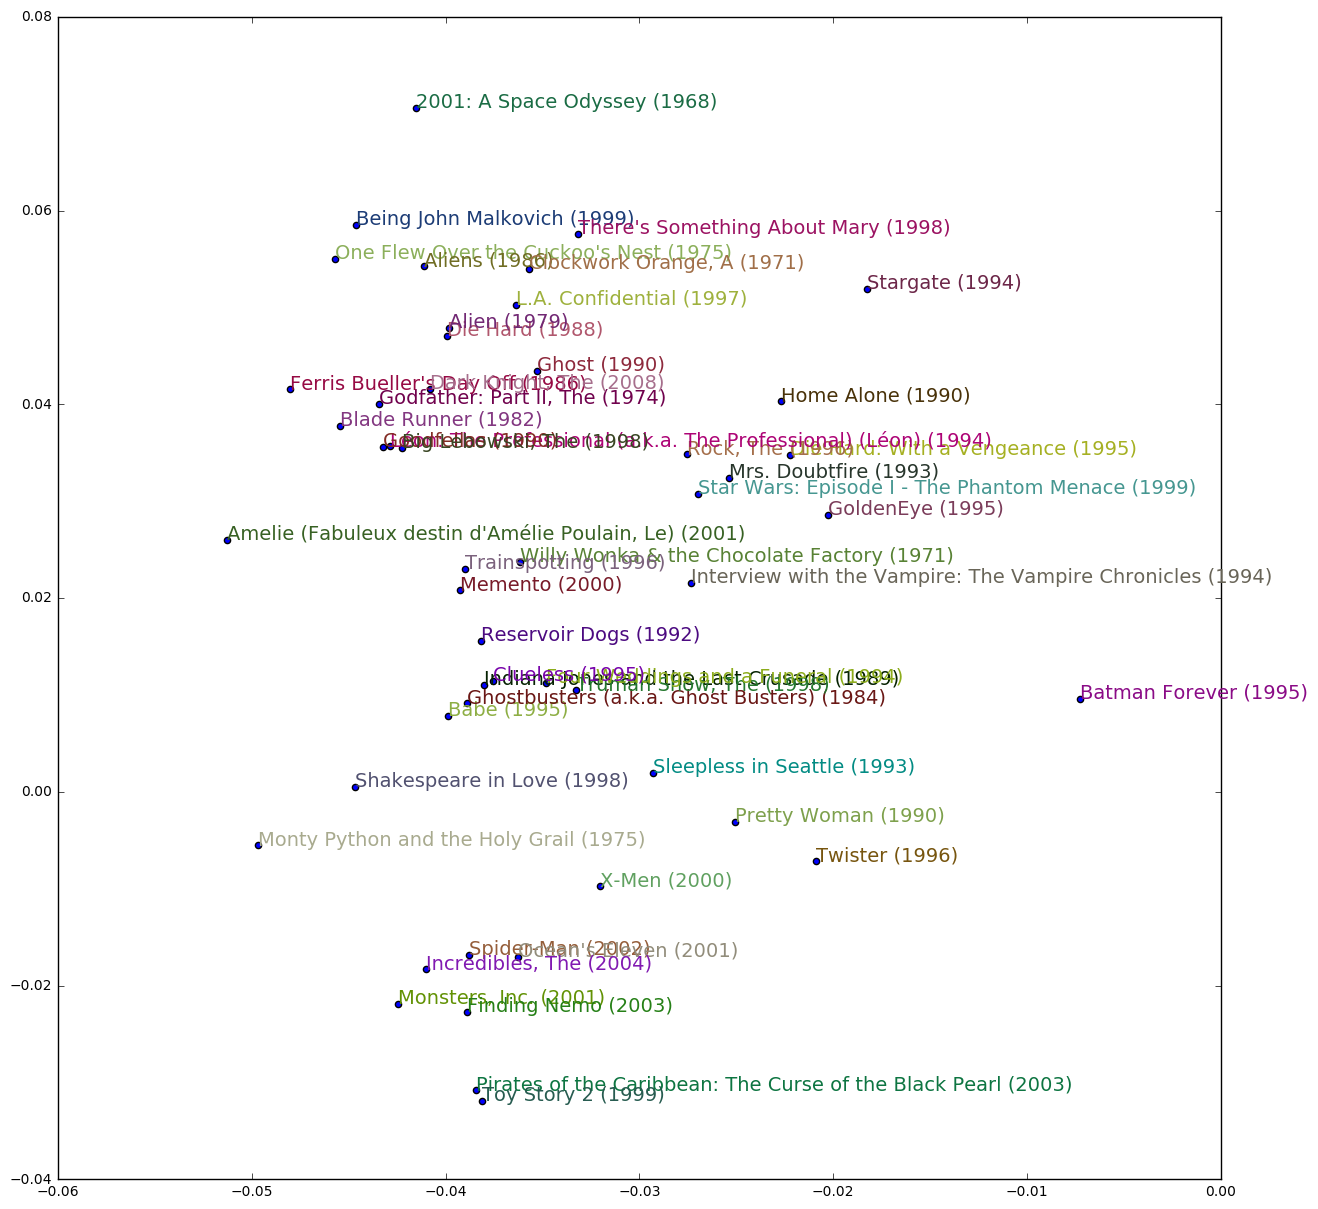

In [180]:
start=50; end=100
X = fac0[start:end]
Y = fac2[start:end]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[start:end], X, Y):
    plt.text(x,y,movie_names[movies[i]], color=np.random.rand(3)*0.7, fontsize=14)
plt.show()

##  Neural net

Rather than creating a special purpose architecture (like our dot-product with bias earlier), it's often both easier and more accurate to use a standard neural network. Let's try it! Here, we simply concatenate the user and movie embeddings into a single vector, which we feed into the neural net.

In [181]:
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
movie_in, m = embedding_input('movie_in', n_movies, n_factors, 1e-4)

In [182]:
x = merge([u, m], mode='concat')
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(70, activation='relu')(x)
x = Dropout(0.75)(x)
x = Dense(1)(x)
nn = Model([user_in, movie_in], x)
nn.compile(Adam(0.001), loss='mse')

In [ ]:
nn.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, nb_epoch=8, 
          validation_data=([val.userId, val.movieId], val.rating))

This improves on our already impressive accuracy even further!